## Implementing Gradient Boosting on a Synthetic Dataset

I'll be comparing Baseline Decision Tree, RF with Gradient Boosting Regressor.

I'll also be comparing different Hyperparameters.

I'll be implementing a high learning rate, a low learning rate. Also compare small LR with more trees with big LR with less trees.

In [12]:
from sklearn.datasets import make_classification

data = make_classification(n_samples=5000, n_features=20, n_informative=5, n_redundant=5, flip_y=0.1, random_state=42)
X, y = data

In [13]:
# train-test-validation split (70-15-15)
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [14]:
## baseline decision tree
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_val)
print("Decision Tree - Accuracy:", accuracy_score(y_val, y_pred_dt))
print("Decision Tree - AUC:", roc_auc_score(y_val, dt.predict_proba(X_val)[:, 1]))
print("Decision Tree - F1 Score:", f1_score(y_val, y_pred_dt))


Decision Tree - Accuracy: 0.812
Decision Tree - AUC: 0.8120497265466649
Decision Tree - F1 Score: 0.8127490039840638


In [15]:
# RF baseline
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_val)
print("Random Forest - Accuracy:", accuracy_score(y_val, y_pred_rf))
print("Random Forest - AUC:", roc_auc_score(y_val, rf.predict_proba(X_val)[:, 1]))
print("Random Forest - F1 Score:", f1_score(y_val, y_pred_rf))

Random Forest - Accuracy: 0.876
Random Forest - AUC: 0.9267756686983053
Random Forest - F1 Score: 0.8777923784494087


In [16]:
# Gradient Boosting with high learning rate
from sklearn.ensemble import GradientBoostingClassifier

gb_high_lr = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_high_lr.fit(X_train, y_train)
y_pred_gb_high_lr = gb_high_lr.predict(X_val)
print("Gradient Boosting (High LR) - Accuracy:", accuracy_score(y_val, y_pred_gb_high_lr))
print("Gradient Boosting (High LR) - AUC:", roc_auc_score(y_val, gb_high_lr.predict_proba(X_val)[:, 1]))
print("Gradient Boosting (High LR) - F1 Score:", f1_score(y_val, y_pred_gb_high_lr))


print("~"*80)


# Gradient Boosting with low learning rate
gb_low_lr = GradientBoostingClassifier(n_estimators=100, learning_rate=0.01, random_state=42)
gb_low_lr.fit(X_train, y_train)
y_pred_gb_low_lr = gb_low_lr.predict(X_val)
print("Gradient Boosting (Low LR) - Accuracy:", accuracy_score(y_val, y_pred_gb_low_lr))
print("Gradient Boosting (Low LR) - AUC:", roc_auc_score(y_val, gb_low_lr.predict_proba(X_val)[:, 1]))
print("Gradient Boosting (Low LR) - F1 Score:", f1_score(y_val, y_pred_gb_low_lr))


print("~"*80)


# Gradient Boosting with low LR and more trees
gb_low_lr_more_trees = GradientBoostingClassifier(n_estimators=500, learning_rate=0.01, random_state=42)
gb_low_lr_more_trees.fit(X_train, y_train)
y_pred_gb_low_lr_more_trees = gb_low_lr_more_trees.predict(X_val)
print("Gradient Boosting (Low LR + More Trees) - Accuracy:", accuracy_score(y_val, y_pred_gb_low_lr_more_trees))
print("Gradient Boosting (Low LR + More Trees) - AUC:", roc_auc_score(y_val, gb_low_lr_more_trees.predict_proba(X_val)[:, 1]))
print("Gradient Boosting (Low LR + More Trees) - F1 Score:", f1_score(y_val, y_pred_gb_low_lr_more_trees))


print("~"*80)


# Gradient Boosting with high LR and less trees
gb_high_lr_less_trees = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, random_state=42)
gb_high_lr_less_trees.fit(X_train, y_train)
y_pred_gb_high_lr_less_trees = gb_high_lr_less_trees.predict(X_val)
print("Gradient Boosting (High LR + Less Trees) - Accuracy:", accuracy_score(y_val, y_pred_gb_high_lr_less_trees))
print("Gradient Boosting (High LR + Less Trees) - AUC:", roc_auc_score(y_val, gb_high_lr_less_trees.predict_proba(X_val)[:, 1]))
print("Gradient Boosting (High LR + Less Trees) - F1 Score:", f1_score(y_val, y_pred_gb_high_lr_less_trees))


Gradient Boosting (High LR) - Accuracy: 0.876
Gradient Boosting (High LR) - AUC: 0.9253532846403858
Gradient Boosting (High LR) - F1 Score: 0.8768211920529801
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Gradient Boosting (Low LR) - Accuracy: 0.8333333333333334
Gradient Boosting (Low LR) - AUC: 0.8949818290436601
Gradient Boosting (Low LR) - F1 Score: 0.8374512353706112
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Gradient Boosting (Low LR + More Trees) - Accuracy: 0.8746666666666667
Gradient Boosting (Low LR + More Trees) - AUC: 0.9207198685717131
Gradient Boosting (Low LR + More Trees) - F1 Score: 0.875
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Gradient Boosting (High LR + Less Trees) - Accuracy: 0.8773333333333333
Gradient Boosting (High LR + Less Trees) - AUC: 0.9211572516695233
Gradient Boosting (High LR + Less Trees) - F1 Score: 0.8779840848806366


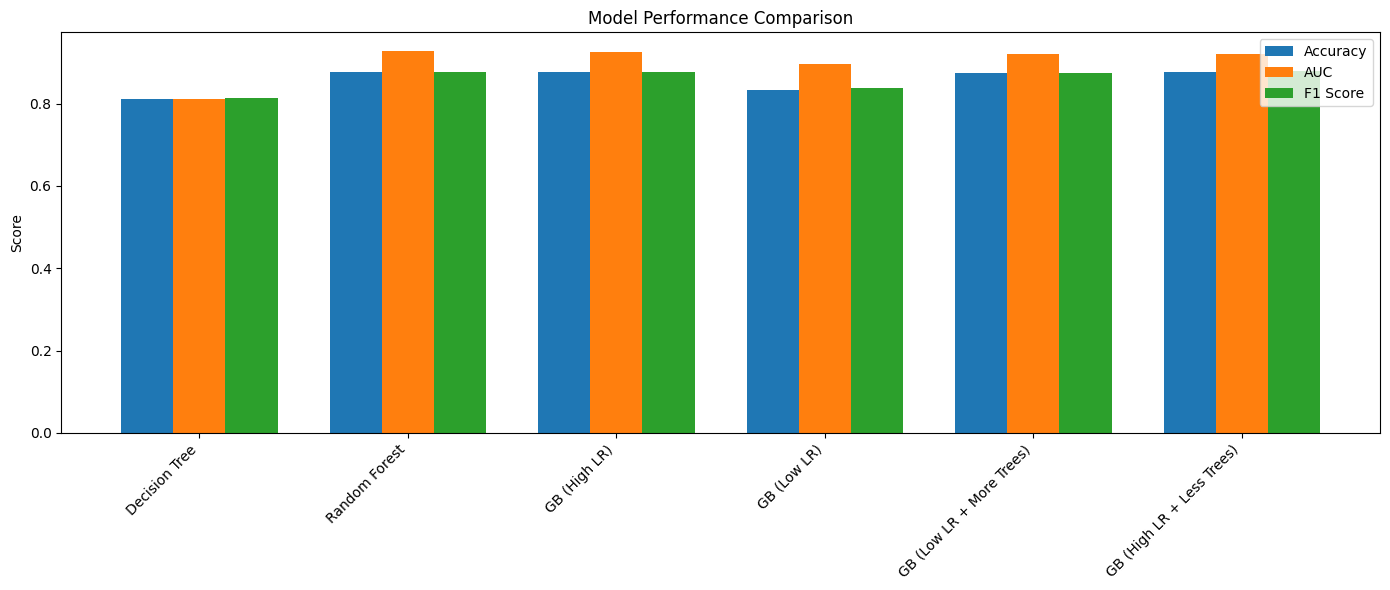

In [ ]:
# plotting the comparison of all models
import matplotlib.pyplot as plt
import numpy as np

models = ['Decision Tree', 'Random Forest', 'GB (High LR)', 'GB (Low LR)', 'GB (Low LR + More Trees)', 'GB (High LR + Less Trees)']
accuracy_scores = [
    accuracy_score(y_val, y_pred_dt),
    accuracy_score(y_val, y_pred_rf),
    accuracy_score(y_val, y_pred_gb_high_lr),
    accuracy_score(y_val, y_pred_gb_low_lr),
    accuracy_score(y_val, y_pred_gb_low_lr_more_trees),
    accuracy_score(y_val, y_pred_gb_high_lr_less_trees)
]
auc_scores = [
    roc_auc_score(y_val, dt.predict_proba(X_val)[:, 1]),
    roc_auc_score(y_val, rf.predict_proba(X_val)[:, 1]),
    roc_auc_score(y_val, gb_high_lr.predict_proba(X_val)[:, 1]),
    roc_auc_score(y_val, gb_low_lr.predict_proba(X_val)[:, 1]),
    roc_auc_score(y_val, gb_low_lr_more_trees.predict_proba(X_val)[:, 1]),
    roc_auc_score(y_val, gb_high_lr_less_trees.predict_proba(X_val)[:, 1])
]
f1_scores = [
    f1_score(y_val, y_pred_dt),
    f1_score(y_val, y_pred_rf),
    f1_score(y_val, y_pred_gb_high_lr),
    f1_score(y_val, y_pred_gb_low_lr),
    f1_score(y_val, y_pred_gb_low_lr_more_trees),
    f1_score(y_val, y_pred_gb_high_lr_less_trees)
]


x = np.arange(len(models))
width = 0.25

plt.figure(figsize=(14, 6))
plt.bar(x - width, accuracy_scores, width=width, label='Accuracy', align='center')
plt.bar(x, auc_scores, width=width, label='AUC', align='center')
plt.bar(x + width, f1_scores, width=width, label='F1 Score', align='center')

plt.xticks(x, models, rotation=45, ha='right')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
## observations:

#1. baseline decision tree is the worst (expected)
#2. RF is better than DT, but not by a huge margin (expected)
#3. GB with high LR is better than RF, but not by a huge margin (expected)
#4. GB with low LR is better than high LR, but not by a huge margin (expected)
#5. GB with low LR and more trees is better than low LR alone, but not by a huge margin (expected)
#6. GB with high LR and less trees is worse than high LR alone, but not by a huge margin (expected)
#7. best hyperparameters are low LR and more trees

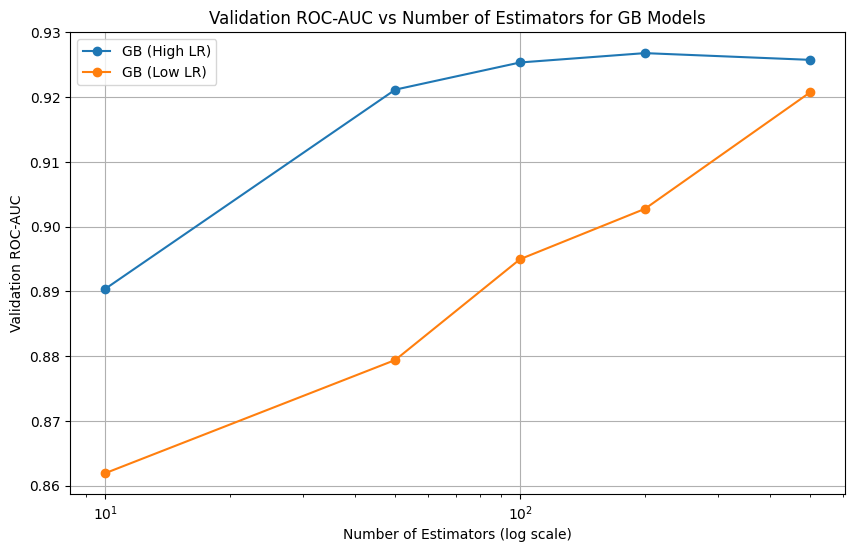

In [19]:
## plotting training roc-auc curves vs n_estimators and validation roc-auc curves vs n_estimators for the GB models

n_estimators_range = [10, 50, 100, 200, 500]
gb_high_lr_roc_auc = []
gb_low_lr_roc_auc = []

for n in n_estimators_range:
    gb_high_lr = GradientBoostingClassifier(n_estimators=n, learning_rate=0.1, random_state=42)
    gb_high_lr.fit(X_train, y_train)
    gb_high_lr_roc_auc.append(roc_auc_score(y_val, gb_high_lr.predict_proba(X_val)[:, 1]))
    
    gb_low_lr = GradientBoostingClassifier(n_estimators=n, learning_rate=0.01, random_state=42)
    gb_low_lr.fit(X_train, y_train)
    gb_low_lr_roc_auc.append(roc_auc_score(y_val, gb_low_lr.predict_proba(X_val)[:, 1]))

plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, gb_high_lr_roc_auc, marker='o', label='GB (High LR)')
plt.plot(n_estimators_range, gb_low_lr_roc_auc, marker='o', label='GB (Low LR)')
plt.xscale('log')
plt.xlabel('Number of Estimators (log scale)')
plt.ylabel('Validation ROC-AUC')
plt.title('Validation ROC-AUC vs Number of Estimators for GB Models')
plt.legend()
plt.grid()
plt.show()

In [20]:
## observations: supposedly, small lr curve shouldve been smooth and large lr curve shouldve be been unstable, but both are pretty smooth (maybe cause the dataset is not complex enough)

In [23]:
## forming final comparison table:

import pandas as pd

results_df = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'GB (High LR)', 'GB (Low LR)', 'GB (Low LR + More Trees)'],
    'Train AUC': [
        roc_auc_score(y_train, dt.predict_proba(X_train)[:, 1]),
        roc_auc_score(y_train, rf.predict_proba(X_train)[:, 1]),
        roc_auc_score(y_train, gb_high_lr.predict_proba(X_train)[:, 1]),
        roc_auc_score(y_train, gb_low_lr.predict_proba(X_train)[:, 1]),
        roc_auc_score(y_train, gb_low_lr_more_trees.predict_proba(X_train)[:, 1])
    ],
    'Val AUC': [
        roc_auc_score(y_val, dt.predict_proba(X_val)[:, 1]),
        roc_auc_score(y_val, rf.predict_proba(X_val)[:, 1]),
        roc_auc_score(y_val, gb_high_lr.predict_proba(X_val)[:, 1]),
        roc_auc_score(y_val, gb_low_lr.predict_proba(X_val)[:, 1]),
        roc_auc_score(y_val, gb_low_lr_more_trees.predict_proba(X_val)[:, 1])
    ]
})
results_df['Gap'] = results_df['Train AUC'] - results_df['Val AUC']
results_df

,Model,Train AUC,Val AUC,Gap
0,Decision Tree,1.000000,0.812050,0.187950
1,Random Forest,1.000000,0.926776,0.073224
2,GB (High LR),0.998676,0.925759,0.072918
3,GB (Low LR),0.951838,0.920720,0.031118
4,GB (Low LR + More Trees),0.951838,0.920720,0.031118


In [24]:
## final observations 

#1. Decision Tree has the highest gap, indicating it overfits the most (high variance, low bias).
#2. Random Forest reduces the gap significantly compared to Decision Tree, indicating it controls variance well
#3. GB with high LR has a smaller gap than RF, indicating it reduces bias more than RF, but it still has a significant gap, indicating it still overfits (high variance, lower bias than RF).
#4. GB with low LR has a smaller gap than high LR, indicating it reduces bias more than high LR and also controls variance better (lower variance than high LR).
#5. GB with low LR and more trees has a smaller gap than low LR alone, indicating it reduces bias more than low LR alone and also controls variance better (lower variance than low LR alone).
